# Recursion
- A recursive function is a function that calls itself.
- Typically, each new call of the function has a smaller input than the preceding one.
- This way a **base** case is reached and the recursive calls stop.
- Recusion is the natural way to solve a problem that is defined **inductively**

#### Factorial
- The factorial function, $f(n)$ is defined as $f(n)=1\times 2\times 3\times\ldots\times n$
- But it can also be defined **inductively** as $f(n)=n\times f(n-1)$
- The **inductive** definition lends itelf, easily, to a recursive computation
     - To compute $f(n)$, first compute $f(n-1)$ then multiply the result by $n$
     - But to compute $f(n-1)$ one has to compute $f(n-2)$ and multiply it by $n-1$
     - ...
     - $f(0)=1$ by definition
- The above leads to the following recursive algorithm

In [ ]:
def factorial(n):
    if n==0:
        return 1
    return n*factorial(n-1)
r=factorial(5)
r

[visualize it](https://pythontutor.com/visualize.html#code=def%20factorial%28n%29%3A%0A%20%20%20%20if%20n%3D%3D0%3A%0A%20%20%20%20%20%20%20%20return%201%0A%20%20%20%20return%20n*factorial%28n-1%29%0Ar%3Dfactorial%285%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

#### Arithmetic sum
- The arithmetic series is defined as  $$AS(n)=\sum_{i=0}^n i$$
- It has an **analytical** form $AS(n)=\frac{n(n+1)}{2}$
- The sum can be written **inductively** as
$$\begin{align*} 
AS(n)&=n+\sum_{i=0}^{n-1} i\\
&=n+AS(n-1)
\end{align*}
$$
-The above **inductive** definition leads to the following algorithm


In [ ]:
def ar_series(x):
    if x==0:
        return 0
    return x+ar_series(x-1) 

n=10
AS=ar_series(n)
print(AS,n*(n+1)/2)


[visualize it](https://pythontutor.com/visualize.html#code=def%20ar_series%28x%29%3A%0A%20%20%20%20if%20x%3D%3D0%3A%0A%20%20%20%20%20%20%20%20return%200%0A%20%20%20%20return%20x%2Bar_series%28x-1%29%20%0A%0An%3D5%0AAS%3Dar_series%28n%29%0Aprint%28AS,n*%28n%2B1%29/2%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

### Geometric Sum
- The geometric sum is defined as $GS(x,n)=\sum_{i=0}^n x^i$
- It has the analytical form for $GS(x,n)=\frac{x^{n+1}-1}{x-1}$ for $x\ne 1$
- The sum can be written **inductively** as
$$\begin{align*}
GS(x,n)&=x^n+\sum_{i=0}^{n-1}x^i\\
&=x^n+GS(x,n-1)
\end{align*}
$$


In [ ]:
## Geometric series
def geo_series(x,n):
    if n==0:
        return 1
    return x**n+geo_series(x,n-1)

n=3
x=2
r=geo_series(x,n)
print(r,(x**(n+1)-1)/(x-1))

### Palindromes
- As you recall a palindrome is a string or a sequence that is equal to its reverse.
- Let $s=c_0c_1\ldots c_{n-1}$ be a string of $n$ characters. $s$ is a palindrome if $c_0=c_{n-1}$ **and** 
$c_1\ldots c_{n-2}$ is a palindrome
- The above leads to the following algorithm


In [ ]:
def is_palindrome(s):
    if len(s)<=1:
        return True
    return s[0]==s[-1] and is_palindrome(s[1:-1])

r=is_palindrome("racecar")
print(r)

[visualize it](https://pythontutor.com/visualize.html#code=def%20is_palindrome%28s%29%3A%0A%20%20%20%20if%20len%28s%29%3C%3D1%3A%0A%20%20%20%20%20%20%20%20return%20True%0A%20%20%20%20return%20s%5B0%5D%3D%3Ds%5B-1%5D%20and%20is_palindrome%28s%5B1%3A-1%5D%29%0A%0Ar%3Dis_palindrome%28%22racecar%22%29%0Aprint%28r%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

#### Reverse a list
- To obtain a general method for reversing a list we start with a few specific examples and then generalize
- Clearly, when the list contains a single, or no, element, it is equal to its own reverse
- If a list contains two elements $L=[x_0,x_1]$ then the reverse $L^R=[x_1,x_0]$
- Let $L=[x_0,x_1,\ldots,x_{n-1}]$ be a list of $n$ elements. We can write $L=[x_0]+[x_1,\ldots,x_{n-2}]+[x_{n-1}]$
- The reverse of $L$, denoted by $L^R$, can be written as $L^R=[x_{n-1},[x_1,\ldots,x_{n-2}]^R,x_0]$
- The above leads to the recursive algorithms below

In [ ]:
# first attempt: doest not work
def failed_reverse(s):
    n=len(s)
    if n<=1:
        return
    s[0],s[-1]=s[-1],s[0]
# the reason it fails is that slicing returns a COPY of s
# so the COPY of s is modified not s itself
    return failed_reverse(s[1:-1])

def reverse(s,start,end):
    if start>=end:
        return
    s[start],s[end]=s[end],s[start]
    reverse(s,start+1,end-1)

a=[1,2,3,4,5]
failed_reverse(a)
print(a)
a=[1,2,3,4,5]
reverse(a,0,len(a)-1)
print(a)

#### Fibonacci sequence


In [ ]:
# Iterative version
import timeit 
def fib(n):
    f=(n+1)*[0]
    f[0],f[1]=0,1
    for i in range(2,n+1):
        f[i]=f[i-1]+f[i-2]
    return f[n]
n=40
a=timeit.timeit('fib(n)',
         setup='from __main__ import fib',
         number=1,globals=globals())
fib(40)
print(a)

In [ ]:
# recursive version
def fibr(n):
    if n==0 or n==1:
        return n
    return fibr(n-2)+fibr(n-1)
n=40
a=timeit.timeit('fibr(n)',
         setup='from __main__ import fibr',
         number=1,globals=globals())
print(a)

### Performance comparison
- The iterative version is clearly $\Theta(n)$
- Let $T(n)$ be the complexity of the recursive version when the input is $n$
- It can be shown that $T(n)\ge\phi^n$ i.e. $T(n)=\Omega\left(\phi^n\right)$ where $\phi$ is the **golden ratio**
- The reason of this exponential behavior is the that _fibr_ **recomputes** some of the values many times.


#### Counting recursive calls
- Using global variables

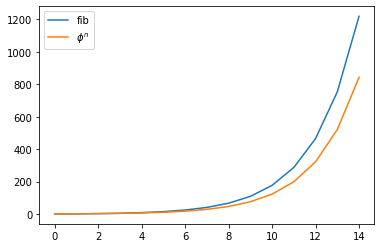

In [5]:
import matplotlib.pyplot as plt
count=0
phi=1.618
def fibr(n):
    global count
    count+=1
    if n==0 or n==1:
        return n
    return fibr(n-2)+fibr(n-1)
vals=[1,1] # for fibr(0) and fibr(1)
n=15
for i in range(2,n):
    fibr(i)
    vals.append(count)
    count=0

x=[i for i in range(n)]
golden_powers=[(phi)**i for i in range(n)]
plt.plot(x,vals,golden_powers)
plt.legend(['fib',r'$\phi^n$'])
plt.show()

### Memoization

- We haver seen that the main performance problem with the recursive fibonacci is that it **recomputes** the same values
- Memoization is to save the values already computed (writing on a memo)


In [4]:
count=0
def memo_fibr(n,L):
    global count
    count+=1
    if L[n]!=-1:
        return L[n]
    if n==0 or n==1:
        return n
    else:
        L[n]=memo_fibr(n-2,L)+memo_fibr(n-1,L)
    return L[n]
n=40
seq=(n+1)*[-1]
memo_fibr(n,seq)

102334155

### Infinite recursion
Typically there are two situations that lead to infinite recursion
1. No base case
1. Base case is never reached

In [ ]:
# missing base case is easy to spot
def fact(n):
    print(n)
    return n*fact(n-1)
n=5
fact(n)

#### base case never reached

- The function collatz(n) below generates the collatz sequence
  Which is known (no proof yet) that it always ends at 1 no matter what the starting value is
- If we replace 3*n+1 by 2*n+1 then sometimes it will never reach 1 and thus goes into an infinite loop
- Actually it will **exhaust** stack space and crashes

In [ ]:
# base case is never reached

def collatz(n):
    print(n,end=' ')
    if n==1:
        return 1
    if n%2==0:
        return collatz(n//2)
    else:
        return collatz(3*n+1)
def wrong_collatz(n):
    print(n,end=' ')
    if n==1:
        return 1
    if n%2==0:
        return wrong_collatz(n//2)
    else:
        return wrong_collatz(2*n+1)
collatz(51)

### Euclid's algorithm for gcd

1. Given two integers $n>m$  we can write $n=km+r$. An integer $g$ is a common divisor for $n$ and $m$ iff $g$ is a 
common divisor for $m$ and $r$
1. Therefore to find gcd of $n,m$ it is sufficient to find gcd for $m,r$. Note that $m>r$.
1. The two observations above leads to a recursive algorithm to compute gcd(n,m)

In [ ]:
import math

count=0
def gcd(a,b):
    global count
    if b==0:
        return a
    count+=1
    return gcd(b,a%b)
phi=1.618
psi=1-phi
a,b=2,1
a,b=3,2
a,b=5,3
a,b=21,13  #F_8, F_7
#a,b=144,89
#a,b=2584,1597 #F_19,F_18
#a,b=2178309,1346269 # F_33, F_32

# a,b=7778742049,4807526976 #F_50,F_49
a,b=218922995834555169026,135301852344706746049 # F_100,F_99
# a,b=a+b,a  # F_101,F_100
# a,b=a+b,a  # F_102,F_101
# a,b=a+b,a  # F_103,F_102
r=gcd(a,b)

print(f'divisor={r},count={count}')
est=math.log(a+b,phi)+math.log(math.sqrt(5),phi)-3
print(est)
a+=13
b+=14
r=gcd(a,b)
print(f'divisor={r},count={count}')


### Complexity
- Let $n$ be the number of steps needed to compute gcd(a,b) using Euclid's algorithm.
- We prove that the _smallest_ values of $a$ and $b$ that require gcd(a,b) to take $n$ steps are $a\ge f_{n+2}$ and $b\ge f_{n+1}$
- Base case: gcd(a,b) is computed in one step, i.e. a%b=0. Then a=2, b=1. On the other hand $f_{3}=2$ and $f_2=1$ thus $a\ge f_{3}$ and $b\ge f_{2}$.
- Hypothesis: assume that if gcd(a,b) is computed in $n-1$ steps then $a\ge f_{n+2}$ and $b\ge f_{n+1}$.
- Induction step: suppose that gcd(a,b) was computed in $n$ steps. But, gcd(a,b)=gcd(b,a%b). Let $a=kb+r$ then 
$$a\ge b+r\ge f_{n+1}+f_{n}\ge f_{n+2}$$
- For large $n$, $f_n\approx \phi^n/\sqrt{5}$ where $\phi=\frac{1+\sqrt{5}}{2}\approx 1.618$ is the golden ratio.
- Therefore, $a+b\ge f_{n+3}\approx \phi^{n+3}/\sqrt{5}\Rightarrow n\le\log_\phi(a+b)-3+\log_\phi(\sqrt{5})$ whence $n=O(\log(a+b))$

### Maximum subarray sum
- We have seen two different methods to compute the MSS
- One was $\Theta(n^3)$ and the other was $\Theta(n^2)$
- In this section we use recursion (divide and conquer) to compute MSS in $\Theta(n\log n)$

In [25]:
def max_both(seq,start,end):
    mid=(start+end)//2
    max_left=seq[mid]
    max_right=seq[mid+1]
    s=0
    for i in range(mid,start-1,-1):
        s+=seq[i]
        if s>max_left:
            max_left=s
    s=0
    for i in range(mid+1,end+1):
        s+=seq[i]
        if s>max_right:
            max_right=s
    return max_left+max_right

def mss(seq,start,end):
    if start>=end:
        return seq[start]
    mid=(start+end)//2
    x=mss(seq,start,mid)
    y=mss(seq,mid+1,end)
    z=max_both(seq,start,end)
    return max(x,y,z)



In [21]:
def max_subarray2(seq):
    n=len(seq)
    start,end=0,0
    max=seq[0]
    for i in range(n):
        sum=0
        for j in range(i,n):
            sum+=seq[j]
            if sum >max:
                start,end=i,j
                max=sum
    return max,start,end


In [18]:
a=[8,-9,12,4,-15,-15,6,8,-2,1]
mss(a,0,len(a)-1)

16

In [29]:
import timeit
from random import randint
n=100000
seq=[randint(-10,30) for i in range(n)]
a=timeit.timeit('max_subarray2(seq)',
         setup='from __main__ import max_subarray2',
         number=1,globals=globals())
b=timeit.timeit('mss(seq,0,len(seq)-1)',
         setup='from __main__ import mss',
         number=1,globals=globals())
print(a,b)

454.0096064999998 0.3531533999994281
